<a href="https://colab.research.google.com/github/YKochura/cv-kpi/blob/main/tutor/t2/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In logistic regression, we are trying to model the outcome of a **binary variable** given a **linear combination of input features**. For example, we could try to predict the outcome of class (pass/fail) using information about how much time a student spent on the final project, how many lecture attended, etc.

# Model

Logistic regression works as follows.


**Given:**

- Train Dataset: $\{(\boldsymbol{X}^{(1)}, y^{(1)}), (\boldsymbol{X}^{(2)}, y^{(2)}),..., (\boldsymbol{X}^{(n)}, y^{(n)})\}$

  - where $\boldsymbol{X}^{(i)}$ &mdash; the $i$-sample. It's $m$-dimensional vector $\boldsymbol{X}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$
  - $n$ &mdash; the total number of training samples
  - $y^{(i)}$ &mdash; the ground truth label of the $i$-sample (binary target variable), $y^{(i)} \in \{0,1\}$

The logistic regression model can be interpreted as a very simple neural network:

- it has a real-valued weight vector $\boldsymbol{W} = \begin{bmatrix}
w_1 & w_2 & \cdots & w_m
\end{bmatrix}$
- it has a real-valued bias $b$
- it uses a sigmoid function as its activation function

The appropriate weights $\boldsymbol{W}= [w_1, w_2, ..., w_m]$ are applied to the input vector $\boldsymbol{x}^{(i)} = (x^{(i)}_1, x^{(i)}_2, ..., x^{(i)}_m)$ and the resulting weighted sum including bias $b$ passed to an activation function that produces the output:

  ![]( https://docs.google.com/uc?export=download&id=13eRRx9vkmfczLaf2de2Mq_E_O1qG9Yhs)

Bias is just like an intercept added in a linear equation. It is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. Moreover, bias value allows you to shift the activation function to either right or left.


# Training

We can train the model using gradient descent. In fact, **gradient descent** (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is small enough and enough training iterations are used).

Training a logistic regression model has different steps. In the beginning (step 0) the parameters are initialized. The other steps are repeated for a specified number of training iterations or until convergence of the parameters.

**Step 0:** Initialize the weight vector and bias (e.g. random values)

**Step 1:** Compute a linear combination of the input features and weights. This can be done in one step for all training examples, using vectorization and broadcasting:
$$z = W \cdot X + b$$

where $\cdot$ denotes the dot product, $W$ is a row vector of shape $(1, m)$, $X$ is a matrix of shape $(m, n)$.

**Step 2:** Apply the sigmoid activation function, which returns values between 0 and 1:

$$\hat y  = \frac{1}{1 + \exp(-z)}$$

**Step 3:** Compute the cost over the whole training set. We want to model the probability of the target values being 0 or 1. So during training we want to adapt our parameters such that our model outputs high values for examples with a positive label (true label being 1) and small values for examples with a negative label (true label being 0). This is reflected in the cost function:

$$J(\hat y,y) = \mathcal{L}(\hat y, y) = - \frac{1}{n} \sum_{i=1}^n \Big[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \Big]$$

**Step 4:** Compute the gradients of the cost function with respect to the weight vector and bias:

$$\boxed{\begin{aligned}
\frac{\partial \mathcal{L}(\hat y, y)}{\partial \hat y} &= -\frac{y}{\hat y} + \frac{1- y}{1 - \hat y} \\[12pt]
\frac{\partial \mathcal{L}(\hat y, y)}{\partial z} &= \frac{\partial \mathcal{L}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} = \hat y - y \\[12pt]
\frac{\partial \mathcal{L}(\hat y, y)}{\partial W} &= \frac{\partial \mathcal{L}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial W} = X \cdot (\hat y - y) \\[12pt]
\frac{\partial \mathcal{L}(\hat y, y)}{\partial b} &=  \frac{\partial \mathcal{L}(\hat y, y)}{\partial \hat y} \frac{\partial \hat y}{\partial z} \frac{\partial z}{\partial b} = \hat y - y
\end{aligned}}$$

**Step 5:** Update the weights and bias:

$$\boxed{\begin{aligned}
W &= W - \alpha \frac{\partial \mathcal{L}(\hat y, y)}{\partial W} \\[12pt]
b &= b - \alpha \frac{\partial \mathcal{L}(\hat y, y)}{\partial b}
\end{aligned}}$$

where $\alpha$ is the learning rate.


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)  # The seed() method is used to initialize the random number generator. By default the random number generator uses the current system time.

## When using the inline backend, your matplotlib graphs will be included in your notebook, next to the code.
%matplotlib inline 

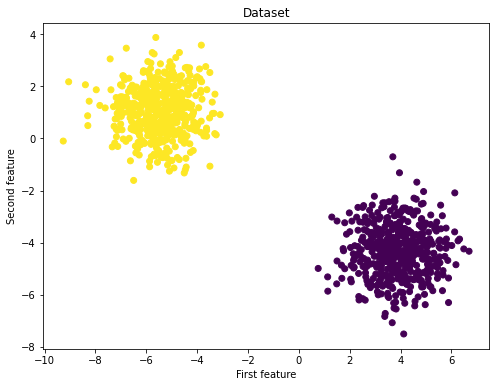

In [2]:
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()


In [3]:
X.shape

(1000, 2)

In [4]:
y_true.shape

(1000,)

In [5]:
# Reshape targets to get column vector with shape (n_samples, 1)
y_true = np.reshape(y_true, (y_true.shape[0], 1))

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, train_size=.8)

print(f'Shape y_true: {y_true.shape}')
print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')



Shape y_true: (1000, 1)
Shape X_train: (800, 2)
Shape y_train: (800, 1)
Shape X_test: (200, 2)
Shape y_test: (200, 1)


# Logistic regression class

In [6]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))

    def train(self, X, y_true, n_iters, learning_rate):
        """
        Trains the logistic regression model on given data X and targets y
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1)
        self.bias = 1
        costs = []
        
        for i in range(n_iters):
            # Step 1 and 2: Compute a linear combination of the input features and weights, 
            # apply the sigmoid activation function
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
            
            # Step 3: Compute the cost over the whole training set.
            cost = (- 1 / n_samples) * np.sum(y_true * np.log(y_predict) + (1 - y_true) * (np.log(1 - y_predict)))

            # Step 4: Compute the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predict - y_true))
            db = (1 / n_samples) * np.sum(y_predict - y_true)

            # Step 5: Update the parameters
            self.weights = self.weights - learning_rate * dw
            self.bias = self.bias - learning_rate * db

            costs.append(cost)
            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

        return self.weights, self.bias, costs

    def predict(self, X):
        """
        Predicts binary labels for a set of examples X.
        """
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in y_predict]

        return np.array(y_predict_labels)[:, np.newaxis]


# Initializing and training the model

Cost after iteration 0: 7.3710762068406535


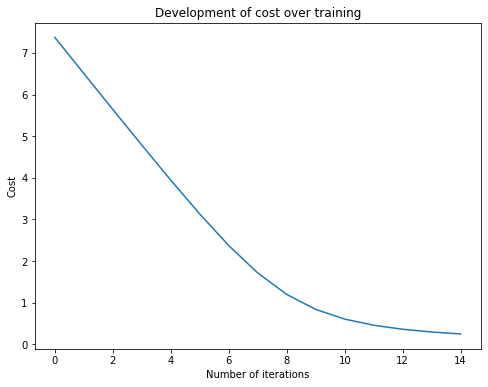

In [7]:
epoch = 15

regressor = LogisticRegression()
w_trained, b_trained, costs = regressor.train(X_train, y_train, n_iters=epoch, learning_rate=0.03)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(epoch), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

# Testing the model

In [8]:
y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

print(f"train accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test))}%")

train accuracy: 99.125%
test accuracy: 99.995%
